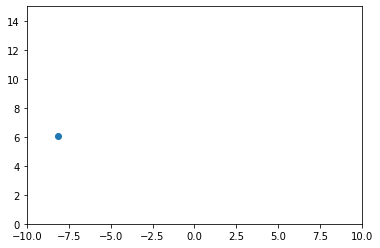

In [95]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
import numpy as np

def initalize(ang, v):
    return v*math.cos(ang), v*math.sin(ang)

def acceleration(y):
    return g/(1+y/R)**2

dt = 0.01
g = -9.8
R = 6300 * 10**3

yt = y0 = 5 # можно выбирать стартовую высоту
xt = x0 = 0 # не менять, потому что в этом смысла мало

at = acceleration(yt)
vxt, vyt = initalize(math.pi/4 , 9)

x = np.array([xt])
y = np.array([yt])
vx = np.array([vxt])
vy = np.array([vyt])
a = np.array([at])
t = np.array([0])

def appendElems(xt, yt, vxt, vyt, at):
    global x, y, vx, vy, a, t
    
    x = np.append(x, xt)
    y = np.append(y, yt)
    vx = np.append(vx, vxt)
    vy = np.append(vy, vyt)
    a = np.append(a, at)
    t = np.append(t, t[-1] + dt)
    
def update():
    global xt, yt, vxt, vyt, at, dt   

    
    
    if yt + dt * vyt <= 0:
        vyt = -min(vy)
        yt = 0
    else:
        yt = yt + dt * vyt
        
    if abs(xt + dt * vxt) >= 10:
        vxt = -vxt    
        xt = 10 if xt > 0 else -10
    else:
        xt = xt + dt * vxt
        
    vyt = vyt + dt * at
    at = acceleration(yt)
    
    appendElems(xt, yt, vxt, vyt, at)
    return xt, yt

def axisUpdate():
    ax.clear()
    ax.set_xlim(-10, 10)
    ax.set_ylim(0, y0 + 10)
    
def animate(i):
    global ax
    axisUpdate()
    x, y = update()
    ax.scatter([x], [y])
    
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(0, y0 + 10))

anim = animation.FuncAnimation(fig, animate, frames = 500, interval=10)
from IPython.display import HTML
HTML(anim.to_jshtml())     

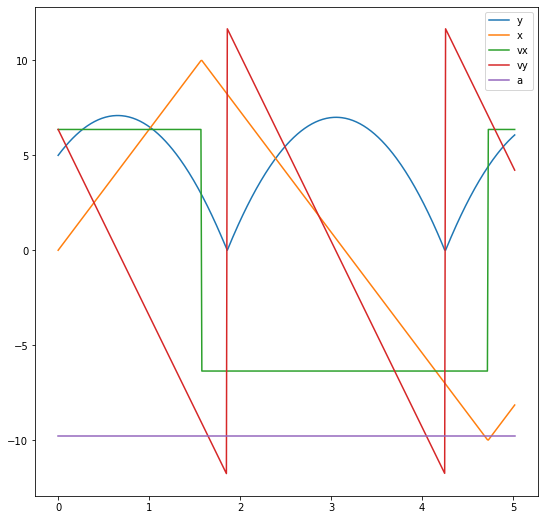

In [96]:
fig = plt.figure(figsize=(9, 9))

plt.plot(t, y, label="y")
plt.plot(t, x, label="x")
plt.plot(t, vx, label="vx")
plt.plot(t, vy, label="vy")
plt.plot(t, a, label="a")

plt.legend()

plt.show()

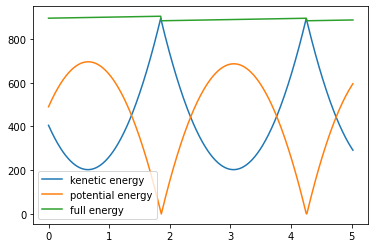

In [98]:
mass = 10 
K = [mass/2 * (vx[i]**2 + vy[i]**2) for i in range(len(t))]

P = [mass * (-1) * a[i] * y[i] for i in range(len(t))]
E = [K[i] + P[i] for i in range(len(t))]

plt.plot(t, K, label="kenetic energy")
plt.plot(t, P, label="potential energy")
plt.plot(t, E, label="full energy")

plt.legend()
plt.show()